# Titanic Dataset - Notebook

The Notebook layouts out comprehensive data analysis on the Titanic data set available at 

https://www.kaggle.com/c/titanic 

This is done as an exercise for Udemy Course.

Data Available at : https://www.kaggle.com/c/titanic/data



In [1]:
import pandas as pd

from pandas import Series, DataFrame

In [2]:
titanic_df=pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


VARIABLE DESCRIPTIONS:

survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


## Basic Questions :

### 1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

### 2.) What deck were the passengers on and how does that relate to their class?

### 3.) Where did the passengers come from?

### 4.) Who was alone and who was with family?

### Broader question:

### 5.) What factors helped someone survive the sinking?


In [5]:
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


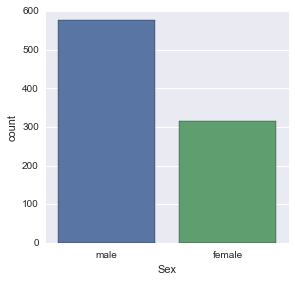

In [7]:
sns.factorplot('Sex',data=titanic_df,kind='count')

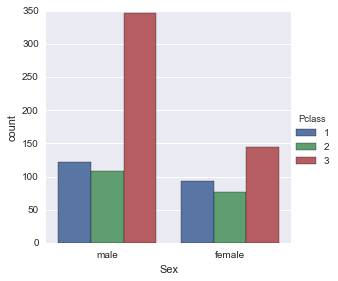

In [8]:
sns.factorplot('Sex',data=titanic_df,hue='Pclass',kind='count')

In [9]:
def male_female_child(passenger):
    age, sex= passenger
    if age <16:
        return 'Child'
    else:
        return sex 

In [10]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [11]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,Child


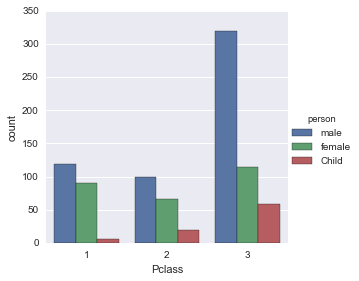

In [12]:
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

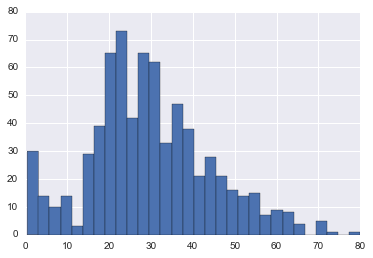

In [13]:
titanic_df['Age'].hist(bins=30)

In [14]:
titanic_df['Age'].mean()

29.69911764705882

In [15]:
titanic_df['person'].value_counts()

male      537
female    271
Child      83
Name: person, dtype: int64

#### The above charts explains the first question. Clearly the titanic had more male passengers with most of them traveling in 3rd Class. The 271 female passengers were almost evenly spread out between the 3 classes. The number of children in 3rd class outnumber the combined 1st and 2nd class passengers. The average age of all passengers is 30 years. 

### Question 2:

What deck were the passengers on and how does that relate to their class?

In [16]:
#Refresh the data set again 

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [17]:
cabin_deck=titanic_df['Cabin'].dropna()

In [18]:
                                                                                                                                                                                                                           cabin_deck.describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [19]:
#LEts group each deck by first letter 

levels=[]

for i in cabin_deck:
    levels.append(i[0])
levels=sorted(levels)        
cabin_df=DataFrame(levels)
cabin_df.columns=['Cabin']


In [20]:
cabin_df.head()


,Cabin
0,A
1,A
2,A
3,A
4,A


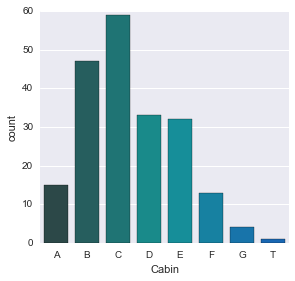

In [21]:
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count')

In [22]:
cabin_df['Cabin'].describe()

count     204
unique      8
top         C
freq       59
Name: Cabin, dtype: object

Question 3 : Where did the passengeners come from ?

We will be using Embarked column



In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


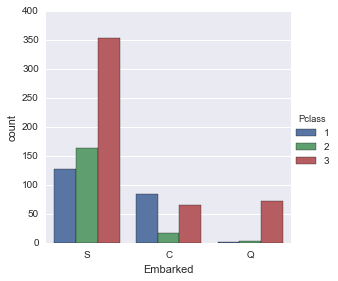

In [25]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass', kind='count' )

Southampton was the port where most people emabarked . Cherbough seems to be a fairly affluent community while Queenstown is one of those where 3rd class citizens live.

Question 4 :
Who was alone and who was with family?


In [26]:
#Fields to be used : SibSp , Parch 

In [31]:
titanic_df['Alone'] = (titanic_df.SibSp  +
                       titanic_df.Parch)

In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,0


In [33]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]='False'

titanic_df['Alone'].loc[titanic_df['Alone']==0]='True'

/Users/raj/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,False
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,True


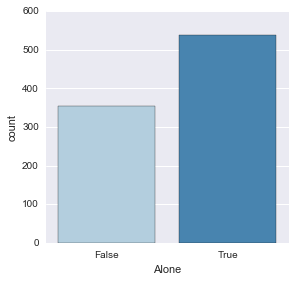

In [35]:
sns.factorplot('Alone', data=titanic_df, palette='Blues',kind='count')

In [37]:
titanic_df['Alone'].describe()

count      891
unique       2
top       True
freq       537
Name: Alone, dtype: object

A total of 537 passengers were travelling alone and 354 were with family.

Roughly 60/40 split 

Broader question:
Question 5 :
What factors helped someone survive the sinking?


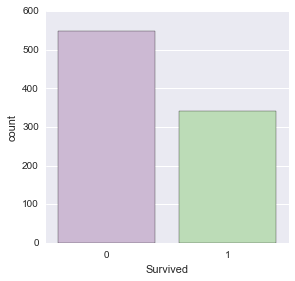

In [39]:
sns.factorplot('Survived',data=titanic_df, palette='PRGn',kind='count')

In [41]:
titanic_df['Survived'].sum()

342

In [44]:
342.0/891*100



38.38383838383838

38% of the travellers survived 

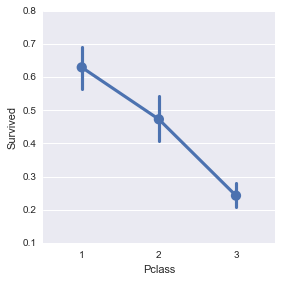

In [54]:
sns.factorplot(x="Pclass",y="Survived", data=titanic_df)

Passengers from 3rd class(majority male) had the least survival rate 

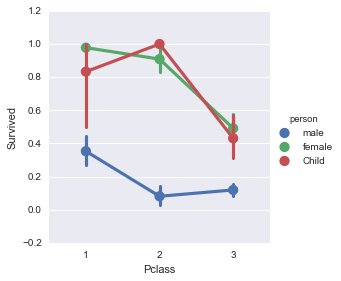

In [56]:
sns.factorplot(x="Pclass",y="Survived",hue='person', data=titanic_df)

In [57]:
#Women and especially children in all classes had higher survival rates than men in any class

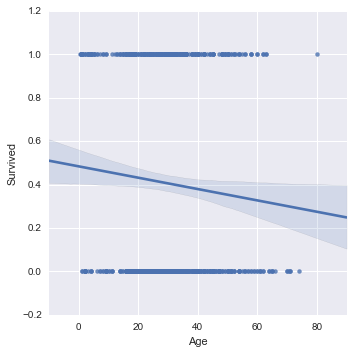

In [58]:
sns.lmplot(x='Age',y='Survived', data=titanic_df)

#Seeming trend
#older the passenger higher the rate of survival

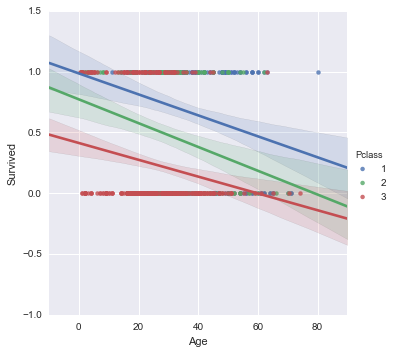

In [60]:
sns.lmplot(x='Age',y='Survived', data=titanic_df,hue='Pclass')

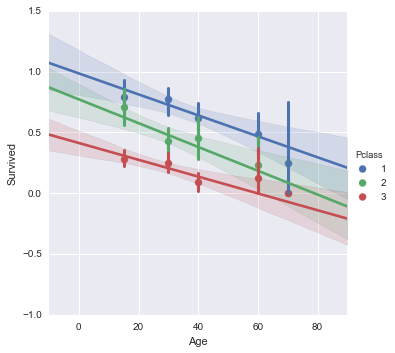

In [62]:
agebins=[15,30,40,60,70]

sns.lmplot(x='Age',y='Survived', data=titanic_df,hue='Pclass',x_bins=agebins)

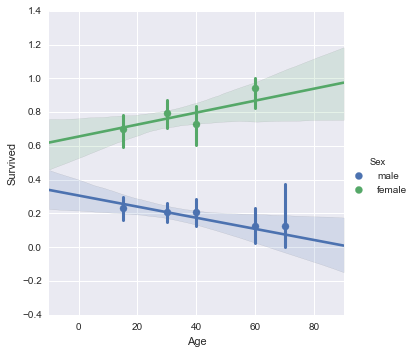

In [63]:
sns.lmplot(x='Age',y='Survived', data=titanic_df,hue='Sex',x_bins=agebins)

#Clearly, female passengers had higher rates of survial than male. Older women had hihger chances of sruvival compared to younger women and vice versa for men.

Additional Questions

1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

2.) Did having a family member increase the odds of surviving the crash?

In [65]:
titanic_df['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [66]:
titanic_df['Cabin'].isnull().sum()

687

The number of missing entries are  687/891,meaning the data set on cabins is not enough to conclude survival rates with confidence 

In [67]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,False
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,True


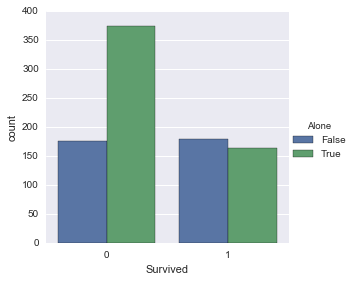

In [81]:
sns.factorplot('Survived', data=titanic_df,hue='Alone', kind='count')

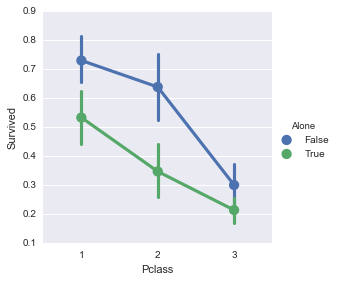

In [84]:
sns.factorplot(y='Survived',x='Pclass',data=titanic_df,hue='Alone')

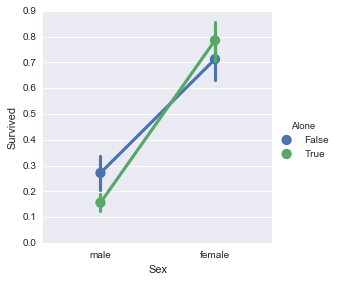

In [85]:
sns.factorplot(y='Survived',x='Sex',data=titanic_df,hue='Alone')

#Female passengers with family members had higher chance of survival than women travelling alone. 

### The End